
# Project: Investigate the FBI Gun Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The data comes from the FBI's
National Instant Criminal Background
Check System. The NICS is used by to
determine whether a prospective
buyer is eligible to buy firearms or
explosives. Gun shops call into this
system to ensure that each customer
does not have a criminal record or
isn’t otherwise ineligible to make a
purchase.<br>

The data has been
supplemented with state level data
from census.gov.<br>
● The NICS data is found in one
sheet of an .xlsx file. It contains
the number of firearm checks by
month, state, and type.<br>
● The U.S. census data is found
in a .csv file. It contains several
variables at the state level. Most
variables just have one data
point per state (2016), but a few
have data for more than one
year.<BR><BR>


Some of the questions to be investigated:<BR>
Q1 -- What is the total annual payroll of all the states (1000 $) in 2015?<BR>
Q2 -- What is the average revenue of firms of all the states in 2012?<BR>
Q3 -- What is the overall trend of gun purchases?<BR>
Q4 --  Which state has the highest purchases for the persons under 18 years, percent on April 1, 2010?<BR>
Q5 -- Which state has the highest purchases for the Black or African American alone, percent, July 1, 2016?<BR>
Q6 -- Which states have had the highest growth in gun registrations?<BR>
Q7 -- What is the sum of registered gun in each state over time?<BR>
Q8 -- How many total guns were registered in June?<BR>



In [1]:
import pandas as pd
import numpy as np
import datetime
from statistics import mode
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
> In this section we will load the data from the 2 files of the report, trim and clean dataset for the analysis pross.

### General Properties

In [2]:
df = pd.read_csv('U.S. Census Data.csv')
df.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [3]:
Exl = pd.ExcelFile('gun_data.xlsx')
 
Exl.sheet_names
[u'Sheet1']

df1 = Exl.parse("Sheet1")
df1.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [7]:
df.shape

(85, 52)

In [8]:
df1.shape

(12485, 27)

In [9]:
for i, v in enumerate(df.columns):
    print(i, v)

0 Fact
1 Fact Note
2 Alabama
3 Alaska
4 Arizona
5 Arkansas
6 California
7 Colorado
8 Connecticut
9 Delaware
10 Florida
11 Georgia
12 Hawaii
13 Idaho
14 Illinois
15 Indiana
16 Iowa
17 Kansas
18 Kentucky
19 Louisiana
20 Maine
21 Maryland
22 Massachusetts
23 Michigan
24 Minnesota
25 Mississippi
26 Missouri
27 Montana
28 Nebraska
29 Nevada
30 New Hampshire
31 New Jersey
32 New Mexico
33 New York
34 North Carolina
35 North Dakota
36 Ohio
37 Oklahoma
38 Oregon
39 Pennsylvania
40 Rhode Island
41 South Carolina
42 South Dakota
43 Tennessee
44 Texas
45 Utah
46 Vermont
47 Virginia
48 Washington
49 West Virginia
50 Wisconsin
51 Wyoming


In [10]:
for i, v in enumerate(df1.columns):
    print(i, v)

0 month
1 state
2 permit
3 permit_recheck
4 handgun
5 long_gun
6 other
7 multiple
8 admin
9 prepawn_handgun
10 prepawn_long_gun
11 prepawn_other
12 redemption_handgun
13 redemption_long_gun
14 redemption_other
15 returned_handgun
16 returned_long_gun
17 returned_other
18 rentals_handgun
19 rentals_long_gun
20 private_sale_handgun
21 private_sale_long_gun
22 private_sale_other
23 return_to_seller_handgun
24 return_to_seller_long_gun
25 return_to_seller_other
26 totals


In [11]:
df.dtypes

Fact              object
Fact Note         object
Alabama           object
Alaska            object
Arizona           object
Arkansas          object
California        object
Colorado          object
Connecticut       object
Delaware          object
Florida           object
Georgia           object
Hawaii            object
Idaho             object
Illinois          object
Indiana           object
Iowa              object
Kansas            object
Kentucky          object
Louisiana         object
Maine             object
Maryland          object
Massachusetts     object
Michigan          object
Minnesota         object
Mississippi       object
Missouri          object
Montana           object
Nebraska          object
Nevada            object
New Hampshire     object
New Jersey        object
New Mexico        object
New York          object
North Carolina    object
North Dakota      object
Ohio              object
Oklahoma          object
Oregon            object
Pennsylvania      object


In [12]:
df1.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

In [13]:
sum(df.duplicated())

3

In [15]:
sum(df1.duplicated())

0

In [16]:
sum(df.isnull().any())

52

In [17]:
df.isnull().any()

Fact              True
Fact Note         True
Alabama           True
Alaska            True
Arizona           True
Arkansas          True
California        True
Colorado          True
Connecticut       True
Delaware          True
Florida           True
Georgia           True
Hawaii            True
Idaho             True
Illinois          True
Indiana           True
Iowa              True
Kansas            True
Kentucky          True
Louisiana         True
Maine             True
Maryland          True
Massachusetts     True
Michigan          True
Minnesota         True
Mississippi       True
Missouri          True
Montana           True
Nebraska          True
Nevada            True
New Hampshire     True
New Jersey        True
New Mexico        True
New York          True
North Carolina    True
North Dakota      True
Ohio              True
Oklahoma          True
Oregon            True
Pennsylvania      True
Rhode Island      True
South Carolina    True
South Dakota      True
Tennessee  

In [18]:
sum(df1.isnull().any())

23

In [19]:
df1.isnull().any()

month                        False
state                        False
permit                        True
permit_recheck                True
handgun                       True
long_gun                      True
other                         True
multiple                     False
admin                         True
prepawn_handgun               True
prepawn_long_gun              True
prepawn_other                 True
redemption_handgun            True
redemption_long_gun           True
redemption_other              True
returned_handgun              True
returned_long_gun             True
returned_other                True
rentals_handgun               True
rentals_long_gun              True
private_sale_handgun          True
private_sale_long_gun         True
private_sale_other            True
return_to_seller_handgun      True
return_to_seller_long_gun     True
return_to_seller_other        True
totals                       False
dtype: bool

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

In [23]:
df.describe()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,80,28,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,80,15,65,64,64,64,63,64,63,64,...,65,64,64,64,63,65,65,64,65,64
top,"Median value of owner-occupied housing units, ...",(c),"67,370,353",7.30%,50.30%,50.90%,50.30%,3.30%,5.70%,51.60%,...,814195,0.048,50.40%,2.50%,1.90%,5.10%,"44,077",1.50%,"2,624,358",7.10%
freq,1,6,1,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


In [24]:
df1.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


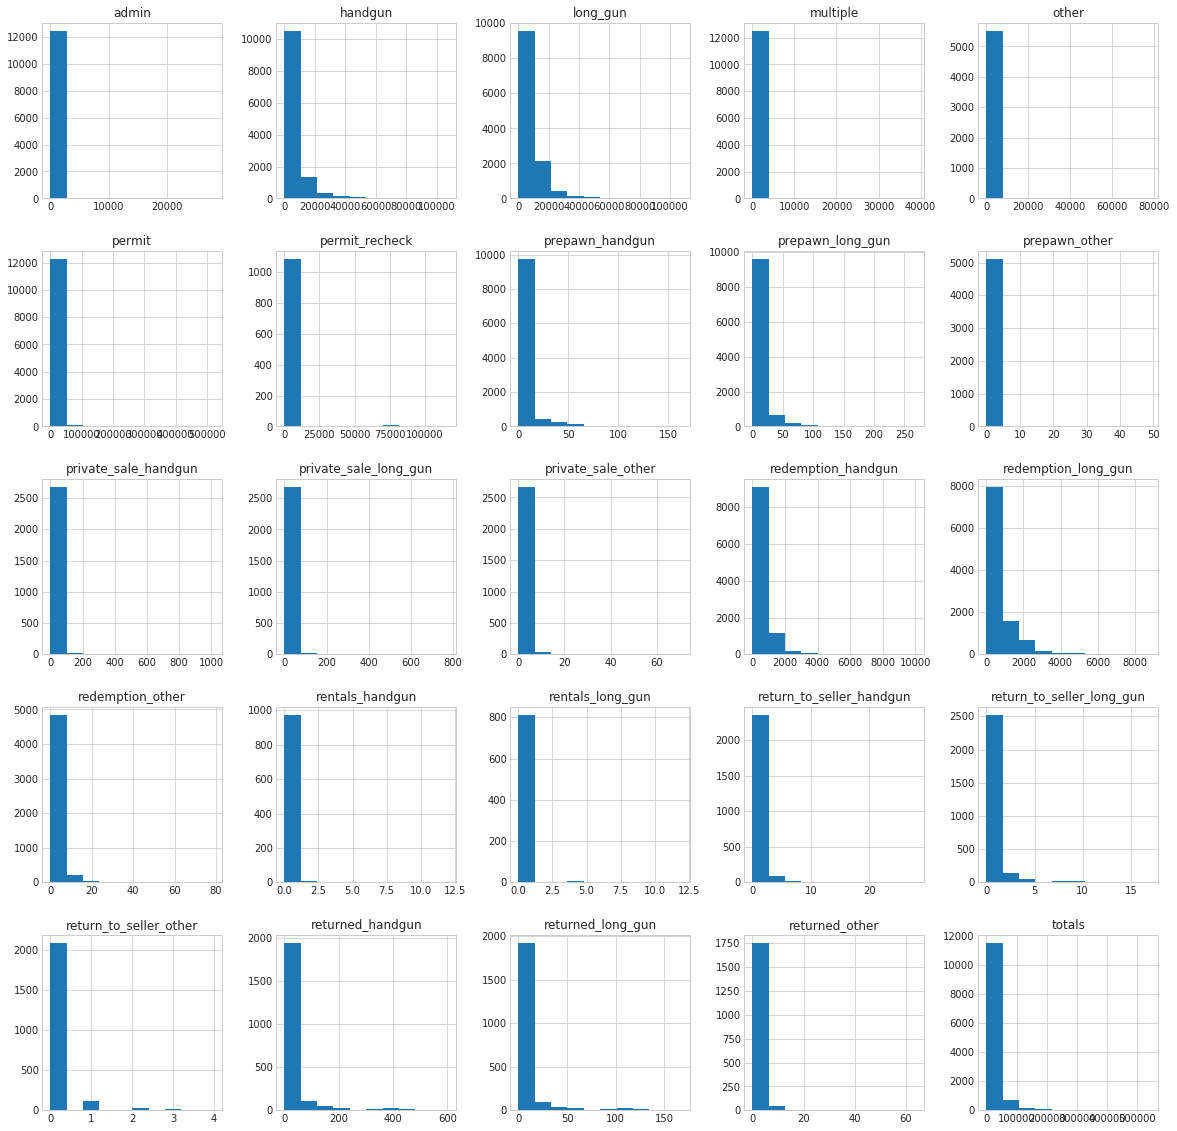

In [6]:
df1.hist(figsize=(20,20));

### Data Cleaning

In [14]:
# After investigating the structure of the data and any issues that need to be
#   cleaned, we need to perform those cleaning steps in this second part.

# Drop duplicates in df
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

In [15]:
# Drop duplicates in df1
df1.drop_duplicates(inplace=True)
sum(df.duplicated())

0

In [16]:
# Change column names in df1 into lower case
df.rename(columns = lambda x: x.lower(), inplace = True)
df.head()

,fact,fact note,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,...,south dakota,tennessee,texas,utah,vermont,virginia,washington,west virginia,wisconsin,wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [17]:
# Converting df columns into float Skiping the first 2 columns as they should be string type.
col = df.iloc[:,2:].columns
for c in col:
    df[c] = df[c].str.extract('(\d+)').astype(float)
    

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 84
Data columns (total 52 columns):
fact              80 non-null object
fact note         28 non-null object
alabama           65 non-null float64
alaska            64 non-null float64
arizona           65 non-null float64
arkansas          65 non-null float64
california        65 non-null float64
colorado          65 non-null float64
connecticut       65 non-null float64
delaware          65 non-null float64
florida           65 non-null float64
georgia           65 non-null float64
hawaii            64 non-null float64
idaho             65 non-null float64
illinois          65 non-null float64
indiana           65 non-null float64
iowa              65 non-null float64
kansas            65 non-null float64
kentucky          65 non-null float64
louisiana         65 non-null float64
maine             64 non-null float64
maryland          65 non-null float64
massachusetts     65 non-null float64
michigan          64 non-

In [18]:
# Replace all NaN values in df with 'No Record' 
df.fillna('No record', inplace = True)

df.isnull().any()

fact              False
fact note         False
alabama           False
alaska            False
arizona           False
arkansas          False
california        False
colorado          False
connecticut       False
delaware          False
florida           False
georgia           False
hawaii            False
idaho             False
illinois          False
indiana           False
iowa              False
kansas            False
kentucky          False
louisiana         False
maine             False
maryland          False
massachusetts     False
michigan          False
minnesota         False
mississippi       False
missouri          False
montana           False
nebraska          False
nevada            False
new hampshire     False
new jersey        False
new mexico        False
new york          False
north carolina    False
north dakota      False
ohio              False
oklahoma          False
oregon            False
pennsylvania      False
rhode island      False
south carolina  

In [19]:
col1 = df1.iloc[:,np.r_[2:7, 8:26]].columns
for c in col1:
    c_mean = df1[c].mean()
    df1[c].fillna(c_mean, inplace = True)
    

df1.isnull().any()

month                        False
state                        False
permit                       False
permit_recheck               False
handgun                      False
long_gun                     False
other                        False
multiple                     False
admin                        False
prepawn_handgun              False
prepawn_long_gun             False
prepawn_other                False
redemption_handgun           False
redemption_long_gun          False
redemption_other             False
returned_handgun             False
returned_long_gun            False
returned_other               False
rentals_handgun              False
rentals_long_gun             False
private_sale_handgun         False
private_sale_long_gun        False
private_sale_other           False
return_to_seller_handgun     False
return_to_seller_long_gun    False
return_to_seller_other       False
totals                       False
dtype: bool

In [20]:
# Convert string into datatime format in df1
df1.month = pd.to_datetime(df1['month'], errors='coerce')

df1.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09-01,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09-01,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09-01,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09-01,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09-01,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


<a id='eda'></a>
## Exploratory Data Analysis


<b><p style="color:red">Research Question 1 : What is the total annual payroll of all the states (1000 $) in 2015?</p></b>

In [11]:
total_payroll_2015 = df.iloc[52, 2:].sum()

"The total annual payroll of all states in 2015 is {total_payroll_2015} (1000 $).".format(total_payroll_2015 = total_payroll_2015)

'The total annual payroll of all states in 2015 is 1531393139.0 (1000 $).'

<b><p style="color:red">Research Question 2 : What is the average revenue of firms of all the states in 2012?</p></b>

In [12]:
average_revenue_2012 = df.iloc[55, 2:].mean()

"The average revenue of firms of all the states in 2012 is around {average_revenue_2012} US dollor.".format(average_revenue_2012 = average_revenue_2012)

'The average revenue of firms of all the states in 2012 is around 133749.26 US dollor.'

<b><p style="color:red">Research Question 3 : What is the overall trend of gun purchases?</p></b>

/opt/conda/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


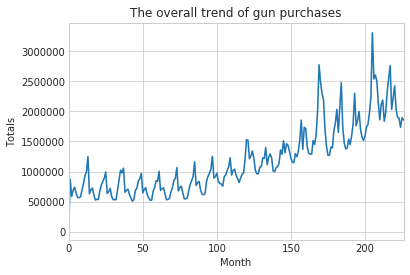

In [25]:
# We use groupby month and sum of totals
# We use this function with the data where observations are 
# nested within sampling units that were measured at multiple time points.

plt.title("The overall trend of gun purchases")
plt.xlabel("Month")
plt.ylabel("Totals");

gun_trend = df1.groupby(['month'])['totals'].sum()

ax = sns.tsplot(data = gun_trend, err_style="unit_traces");

>As this visualization shows, the overall trend is increasing and the speed is becoming faster over time.

<b><p style="color:red">Research Question 4 : Which state has the highest purchases for the persons under 18 years, percent on April 1, 2010?</p></b>

In [21]:
pd.to_numeric(df.iloc[7, 2:])

alabama           23.0
alaska            26.0
arizona           25.0
arkansas          24.0
california        25.0
colorado          24.0
connecticut       22.0
delaware          22.0
florida           21.0
georgia           25.0
hawaii            22.0
idaho             27.0
illinois          24.0
indiana           24.0
iowa              23.0
kansas            25.0
kentucky          23.0
louisiana         24.0
maine             20.0
maryland          23.0
massachusetts     21.0
michigan          23.0
minnesota         24.0
mississippi       25.0
missouri          23.0
montana           22.0
nebraska          25.0
nevada            24.0
new hampshire     21.0
new jersey        23.0
new mexico         0.0
new york           0.0
north carolina     0.0
north dakota       0.0
ohio               0.0
oklahoma           0.0
oregon             0.0
pennsylvania       0.0
rhode island       0.0
south carolina     0.0
south dakota       0.0
tennessee          0.0
texas             27.0
utah       

In [41]:
highest_state = pd.to_numeric(df.iloc[7, 2:]).idxmax(axis = 1)

"The highest purchases record happened in {highest_state} for the persons under 18 years on April 1, 2010?".format(highest_state = highest_state)

'The highest purchages record happened in utah for the persons under 18 years on April 1, 2010?'

In [43]:
highest_percent = df.iloc[7, 2:].loc['utah']

"The highest percent is {highest_percent} % in {highest_state} for the persons under 18 years on April 1, 2010?".format(highest_percent = highest_percent , highest_state = highest_state)

'The highest percent is 31.0 % in utah for the persons under 18 years on April 1, 2010?'

>Utah state had highest purchases record for persons under 18 years on April 1, 2010, and the percent is 31%.

<b><p style="color:red">Research Question 5 : Which state has the highest purchases for the Black or African American alone, percent, July 1, 2016?</p></b>

In [58]:
pd.to_numeric(df.iloc[13, 2:])

alabama           26.0
alaska             3.0
arizona            4.0
arkansas          15.0
california         6.0
colorado           4.0
connecticut       11.0
delaware          22.0
florida           16.0
georgia           32.0
hawaii             2.0
idaho              0.0
illinois          14.0
indiana            9.0
iowa               3.0
kansas             6.0
kentucky           8.0
louisiana         32.0
maine              1.0
maryland          30.0
massachusetts      8.0
michigan          14.0
minnesota          6.0
mississippi       37.0
missouri          11.0
montana            0.0
nebraska           5.0
nevada             9.0
new hampshire      1.0
new jersey        15.0
new mexico         0.0
new york           0.0
north carolina     0.0
north dakota       0.0
ohio               0.0
oklahoma           0.0
oregon             0.0
pennsylvania       0.0
rhode island       0.0
south carolina     0.0
south dakota       0.0
tennessee          0.0
texas             12.0
utah       

In [59]:
highest_state_Black = pd.to_numeric(df.iloc[13, 2:]).idxmax(axis = 1)
highest_state_Black


'mississippi'

In [61]:
highest_percent_Black = df.iloc[13, 2:].loc['mississippi']
highest_percent_Black

37.0

>Mississippi state had highest purchases record for the Black or African American alone on July 1, 2016 and the percent is 37%.



<b><p style="color:red">Research Question 6 : Which states have had the highest growth in gun registrations?</p></b>

In [67]:
# Groupby month, state and sum of totals
gun_alltime = df1.groupby(['month', 'state'])['totals'].sum()

In [68]:
# Find out the earliest and latest registration date
due_date = df1['month'].max()
ear_date = df1['month'].min()

In [69]:
# The amount of registed guns from lastest date substract the earliest date
gun_grow_tot = gun_alltime.loc[due_date] - gun_alltime.loc[ear_date]

# Find the index for the maximum value
gun_grow_tot.idxmax()

'Kentucky'

>The highest growth in gun registrations occurred at 'kentucky' in 2016.

<b><p style="color:red">Research Question 7 : What is the sum of registered gun in each state over time?</p></b>

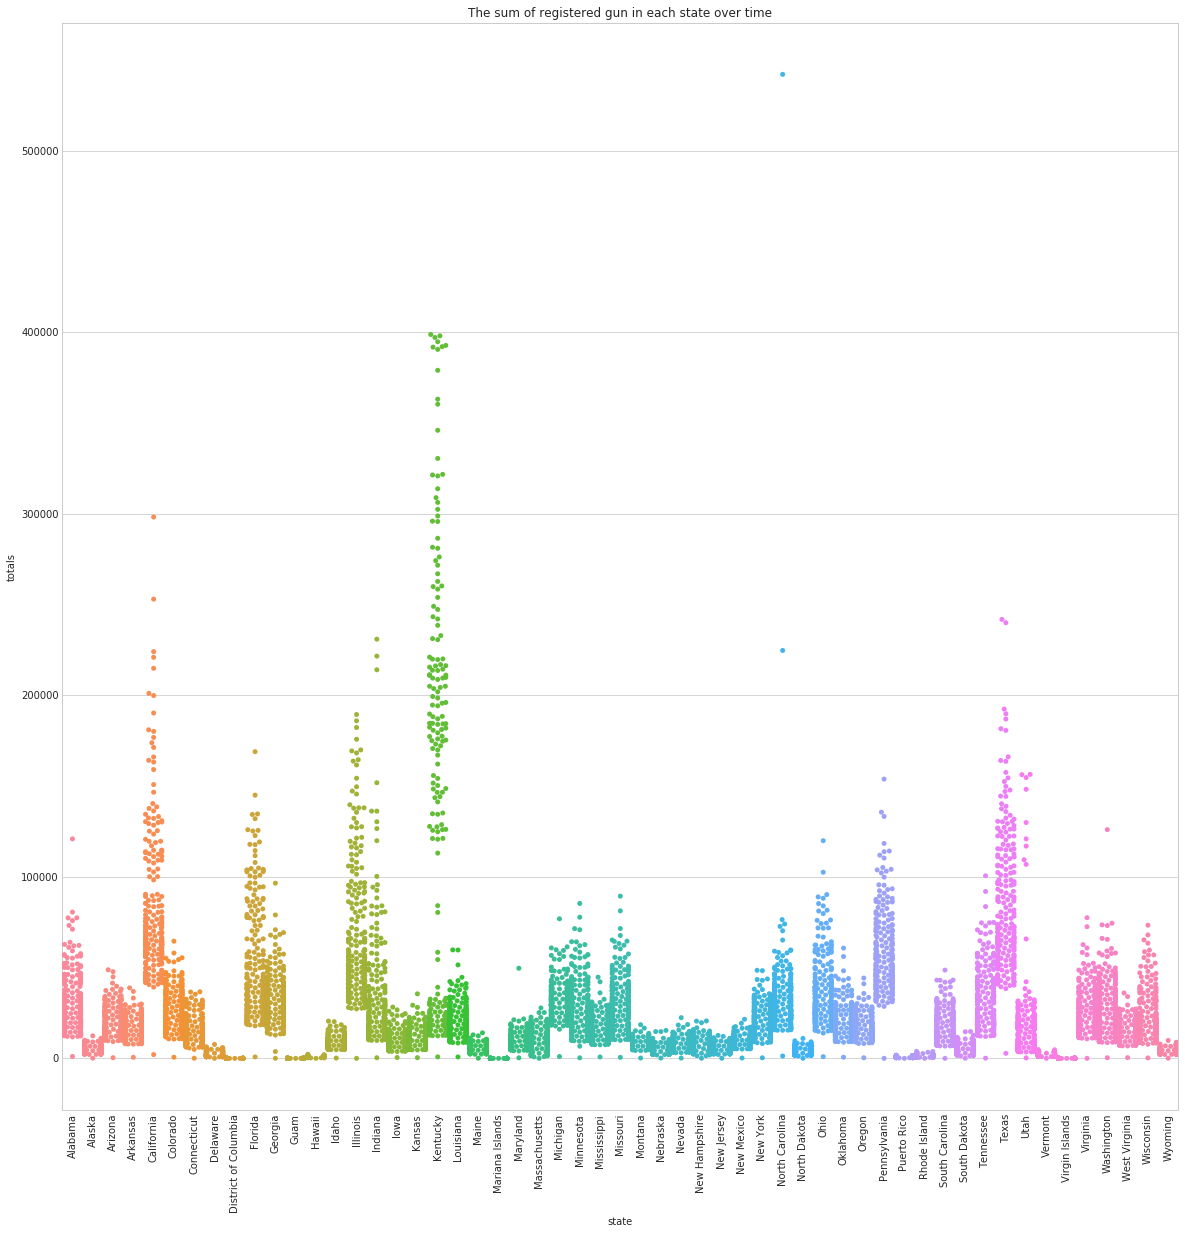

In [22]:
plt.subplots(figsize=(20,20));
plt.xticks(rotation=90);
plt.title("The sum of registered gun in each state over time");
sns.swarmplot(x='state', y='totals', size = 5, data=df1);

>The sum of registered gun in each state over time and the state that had the highest growth in gun registrations is “Kentucky” as shown in this visualization. 

<b><p style="color:red">Research Question 8 : How many total guns were registered in June?</p></b>

In [10]:
# Extract month from datetime column (month)
# Copy the dataframe and add a new column with this newly generated month 

month_data = df1.month.dt.strftime("%B")

df_copy = df1.copy()

df_copy['registed_month']= month_data

In [26]:
# Find all the rows in June and July and sum the totals
# Use substration to find the answer

july_gun = df_copy.query('registed_month == "July"')
june_gun = df_copy.query('registed_month == "June"')
guns_in_june = july_gun.totals.sum() - june_gun.totals.sum()

"The total registered guns in June was {guns_in_june} pieces.".format(guns_in_june = guns_in_june)

'The total registered guns in June was 156807 pieces.'

<a id='conclusions'></a>
## Conclusions

The results from this project can be summarized as follows. 
It has 2 files, the excel file contains sales data during the period from the year 1998 to the year 2017 in each state.<br> 
The CSV file contains several variables at the state level,  Most variables just have one data point per state (2016), but a few have data for more than one year.<br><br>

After analyzing these data we found some insights as:-<br>
1-	The total annual payroll of all states in 2015 is 1531393139.0 (1000 $).

2- The average revenue of firms of all the states in 2012 is around 133749.26 $

3- The highest purchases record happened in the state of “Utah” for the persons less than 18 years on April 1, 2010, with a percent of 31.0 %

4- The highest purchases record for the Black or African American alone happened in the state of “Mississippi” for the persons less than 18 years on July 1, 2016, with a percent of 37.0 %

5- The state that had the highest growth in gun registrations is “Kentucky”

The Excel file was easier to deal with than the CSV file, which had a lot of problems, such as the “NAN” values, and the excel file contained a lot of data and classifications that were not used.
 It was also difficult to deal with 2 different files. The CSV file could only have been confined to data for the years 2010 and 2016 to facilitate the analysis process, or more data could be given for other years, not only limited to these 2 years. It is also noticeable that the number of states in the first file was 55, while in the second file it was 50 states, and this complicated the merging of the 2 files' data.



In [62]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0